Import Required Libraries

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Load the Dataset

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\CODSOFT\titanic-survival-predictor\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
!git init
!git add .
!git commit -m "loaded nessessary libraries and loaded the dataset"
!git push -u origin main

Reinitialized existing Git repository in C:/Users/Lenovo/Desktop/CODSOFT/titanic-survival-predictor/.git/
[main 02c74e9] loaded nessessary libraries and loaded the dataset
 1 file changed, 41 insertions(+)
 create mode 100644 model.ipynb
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   339faff..02c74e9  main -> main


A vital part in datascience is to understand the data and its features.
Understand the Dataset.

In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
!git add .
!git commit -m "understand the dataset"
!git push -u origin main

[main aea8b9d] understand the dataset
 1 file changed, 313 insertions(+), 1 deletion(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   02c74e9..aea8b9d  main -> main


cleaning the dataset is also known as data preprocessing. It involves handling missing values, removing duplicates, and transforming data into a suitable format for analysis or modeling.

In [10]:
# Drop unnecessary columns
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25536\809406222.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25536\809406222.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [11]:
!git add .
!git commit -m "data preprocessing"
!git push -u origin main


[main 54989e4] data preprocessing
 1 file changed, 11 insertions(+), 12 deletions(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   aea8b9d..54989e4  main -> main


Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [12]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
!git add .
!git commit -m "splitting the data into training and testing sets"
!git push -u origin main

[main 6cd22c3] splitting the data into training and testing sets
 1 file changed, 131 insertions(+)
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   54989e4..6cd22c3  main -> main


Training the model here we are going to train our model using random forest classifier since, random forest is a supervised learning algorithm that can be used for both classification and regression tasks. 

It works by constructing multiple decision trees during training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
!git add .
!git commit -m "training the model using random forest classifier"
!git push -u origin main

[main 872e91e] training the model using random forest classifier
 1 file changed, 768 insertions(+), 8 deletions(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   6cd22c3..872e91e  main -> main


Predicting Titanic Survival over test dataset and prining accuracy score of the model.

In [18]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8268156424581006


The model is trained and has an accuracy of 82%

In [19]:
!git add .
!git commit -m "model is trained and has an accuracy of 82%"
!git push -u origin main

[main 8e6ffa7] model is trained and has an accuracy of 82%
 1 file changed, 66 insertions(+), 3 deletions(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   872e91e..8e6ffa7  main -> main


Visualizing feature importance using a bar chart

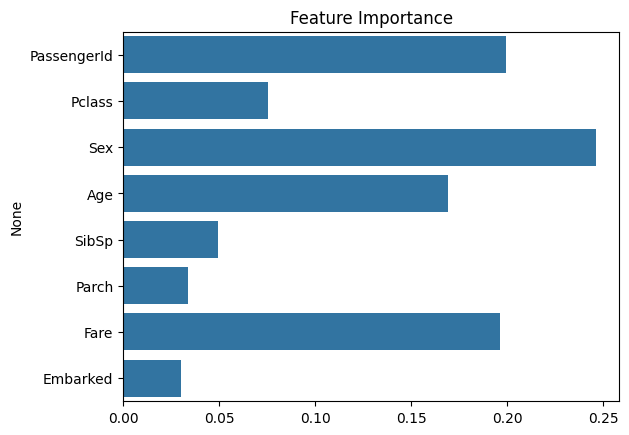

In [20]:
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


Here sex plays a major role in survival rate. Female have more chance of surviving than male.

In [21]:
!git add .
!git commit -m "feature investigation"
!git push -u origin main

[main f3ce4e1] feature investigation
 1 file changed, 64 insertions(+), 3 deletions(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   8e6ffa7..f3ce4e1  main -> main


Lets use logistic regression to predict the survival of passengers on Titanic.

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
!git add .
!git commit -m "Using logistic regression"
!git push -u origin main

[main 32a1334] Using logistic regression
 1 file changed, 79 insertions(+)
branch 'main' set up to track 'origin/main'.


To https://github.com/SUSH9391/CODSOFT.git
   f3ce4e1..32a1334  main -> main


Splitting features and labels

In [26]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training logistic regression model

In [28]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [31]:
!git add .
!git commit -m "trained model on logistic regression over epoch of 1000"
!git push -u origin main

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
branch 'main' set up to track 'origin/main'.


Everything up-to-date


Prediction over test data using the trained model.

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458

Confusion Matrix:
 [[89 16]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [37]:
!git add .
!git commit -m "printed confusion matrix and classification report"
!git push -u origin main

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
branch 'main' set up to track 'origin/main'.


Everything up-to-date


Visualization of correlation between features and target variable.

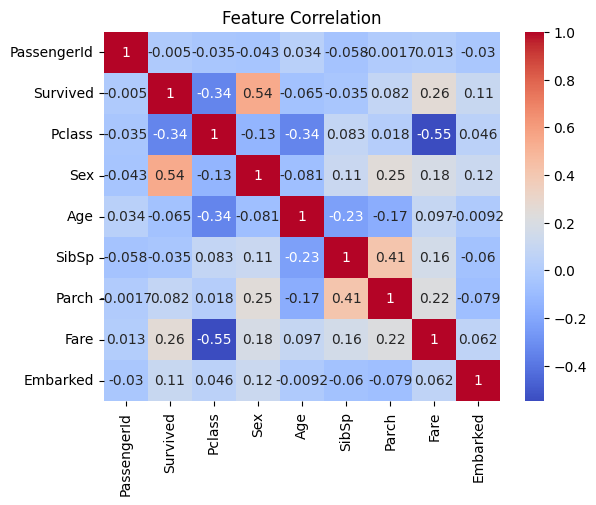

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


Looking at the correlation matrix, we can see that there is a strong positive correlation between 'Age' and 'Survived'. This suggests that older passengers were more likely to survive than younger ones.

remember the general rule of thumb for interpreting correlations:

- A correlation coefficient close to +1 indicates a strong positive relationship.
- A correlation coefficient close to -1 indicates a strong negative relationship.
- A correlation coefficient close to 0 indicates no linear relationship.